# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

In [0]:
# Start your codes here!
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe 

In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default()) #grant access to google drive 

In [0]:
def check_exists(path):
  # open the file. If exist return True
  try:
    sh = gc.open(path)
    return True
  except:
    return False
 
  
  # Your code here

In [0]:
def create_new_worksheet(path='worksheet', sheets={"sheet1":""}):
    if check_exists(path):
        print('create_new_worksheet(): File exists')
        return gc.open(path)
    sh = gc.create(path)
    for name, cols in sheets.items():
        sh.add_worksheet(title=name, rows="100", cols="100")
        sh.values_update(
            name + '!A1',
            params={'valueInputOption': 'RAW'},
            body={'values': [cols]}
        )      
    sh.del_worksheet(sh.sheet1)
    return sh

In [0]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [0]:
file = pd.read_csv('Chocolate.csv')
# Tên các thuộc tính: thay các dấu space thành dâu _ để dễ xử lý

In [75]:
file.head(5)

,Company(Maker_if_known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [76]:
file.info()
# Nhận thấy có 2 giá trị NaN trong Bean_Type và Broad_Bean_Origin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company(Maker_if_known)             1795 non-null object
Specific_Bean_Origin_or_Bar_Name    1795 non-null object
REF                                 1795 non-null int64
Review_Date                         1795 non-null int64
Cocoa_Percent                       1795 non-null object
Company_Location                    1795 non-null object
Rating                              1795 non-null float64
Bean_Type                           1794 non-null object
Broad_Bean_Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [0]:
file[file['Bean_Type'].isna()==True]
# xóa dòng có giá trị NaN vì số lượng không đáng kể
file = file[file['Bean_Type'].isna()==False]

In [0]:
file[file['Broad_Bean_Origin'].isna()]
# xóa dòng có giá trị NaN
file = file[file['Broad_Bean_Origin'].isna()==False]

In [79]:
file.info()
# sau khi xóa NaN thì các giá trị còn lại đều đầy đủ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
Company(Maker_if_known)             1793 non-null object
Specific_Bean_Origin_or_Bar_Name    1793 non-null object
REF                                 1793 non-null int64
Review_Date                         1793 non-null int64
Cocoa_Percent                       1793 non-null object
Company_Location                    1793 non-null object
Rating                              1793 non-null float64
Bean_Type                           1793 non-null object
Broad_Bean_Origin                   1793 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 140.1+ KB


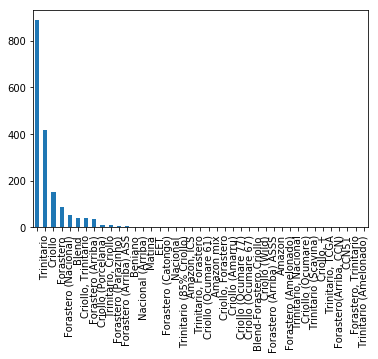

In [88]:
file['Bean_Type'].value_counts().plot(kind='bar')
# có quá nhiều giá trị trống# chưa biết Bean_Type đó